# theramin data

In [5]:
from theramin.util import data_files

data_files / 'gesture_recognizer.task'

PosixPath('/Users/thorwhalen/Dropbox/py/proj/t/theramin/theramin/data/gesture_recognizer.task')

# essentia pitch detector

In [3]:
import essentia.standard as es

from i2 import Sig 


es.PredominantPitchMelodia  # https://essentia.upf.edu/reference/std_PredominantPitchMelodia.html

essentia.standard._create_essentia_class.<locals>.Algo

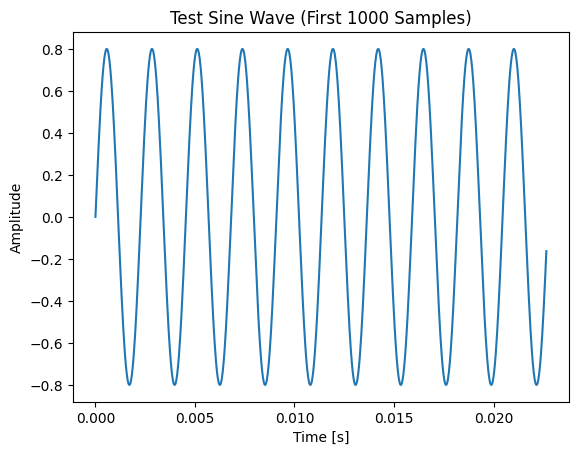

Pitch values (Hz):
[  0.       0.     440.0054 440.0054 440.0054 440.0054 440.0054 440.0054
 440.0054 440.0054 440.0054 440.0054 440.0054 440.0054 440.0054 440.0054
 440.0054 440.0054 440.0054 440.0054 440.0054 440.0054 440.0054 440.0054
 440.0054 440.0054 440.0054 440.0054 440.0054 440.0054 440.0054 440.0054
 440.0054 440.0054 440.0054 440.0054 440.0054 440.0054 440.0054 440.0054
 440.0054 440.0054 440.0054 440.0054 440.0054 440.0054 440.0054 440.0054
 440.0054 440.0054 440.0054 440.0054 440.0054 440.0054 440.0054 440.0054
 440.0054 440.0054 440.0054 440.0054 440.0054 440.0054 440.0054 440.0054
 440.0054 440.0054 440.0054 440.0054 440.0054 440.0054 440.0054 440.0054
 440.0054 440.0054 440.0054 440.0054 440.0054 440.0054 440.0054 440.0054
 440.0054 440.0054 440.0054 440.0054 440.0054 440.0054 440.0054 440.0054
 440.0054 440.0054 440.0054 440.0054 440.0054 440.0054 440.0054 440.0054
 440.0054 440.0054 440.0054 440.0054 440.0054 440.0054 440.0054 440.0054
 440.0054 440.0054 440.0054 440.

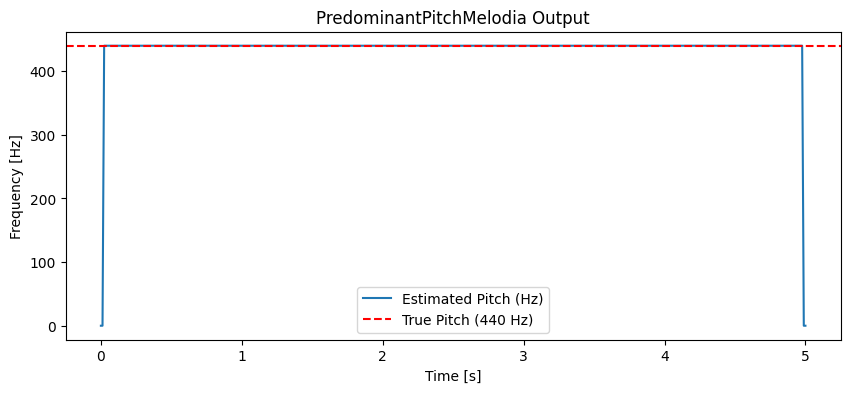

In [6]:
import numpy as np
import essentia.standard as es
import matplotlib.pyplot as plt

# Parameters for the test tone.
duration = 5.0           # seconds
sample_rate = 44100      # Hz
frequency = 440.0        # A4 in Hz
amplitude = 0.8

# Generate a sine wave.
t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
sine_wave = amplitude * np.sin(2 * np.pi * frequency * t).astype(np.float32)

# Plot a short segment of the sine wave.
plt.plot(t[:1000], sine_wave[:1000])
plt.title("Test Sine Wave (First 1000 Samples)")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

# Use Essentia's PredominantPitchMelodia on the generated sine wave.
# We choose a frameSize and hopSize suitable for a steady tone.
frame_size = 2048
hop_size = 512

# Initialize the pitch extractor.
pitch_extractor = es.PredominantPitchMelodia(frameSize=frame_size,
                                             hopSize=hop_size,
                                             sampleRate=sample_rate)

# Process the entire sine wave.
pitch_values, pitch_confidences = pitch_extractor(sine_wave)

# Print out the results.
print("Pitch values (Hz):")
print(pitch_values)
print("Pitch confidences:")
print(pitch_confidences)

# Optionally, plot the extracted pitch contour.
times = np.linspace(0, duration, len(pitch_values))
plt.figure(figsize=(10, 4))
plt.plot(times, pitch_values, label="Estimated Pitch (Hz)")
plt.axhline(frequency, color='r', linestyle='--', label="True Pitch (440 Hz)")
plt.title("PredominantPitchMelodia Output")
plt.xlabel("Time [s]")
plt.ylabel("Frequency [Hz]")
plt.legend()
plt.show()

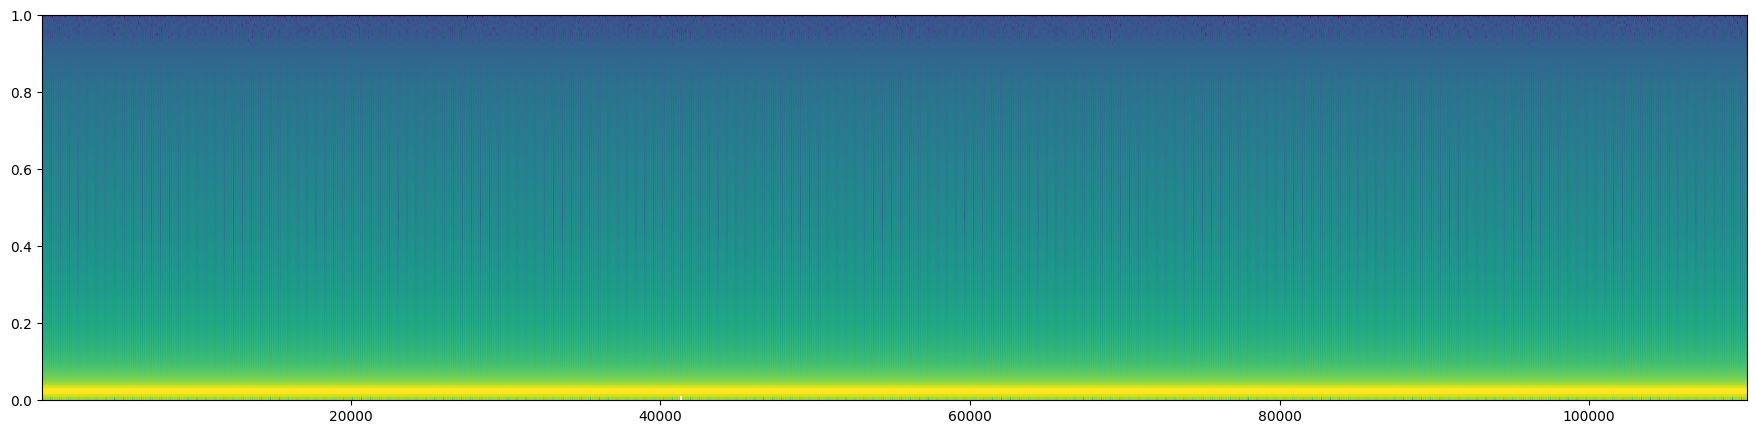

In [7]:
from hum import disp_wf

disp_wf(sine_wave)

# Resources

* Hand gesture recognizer: https://storage.googleapis.com/mediapipe-models/gesture_recognizer/gesture_recognizer/float16/1/gesture_recognizer.task

# Reading a recorded theramin session

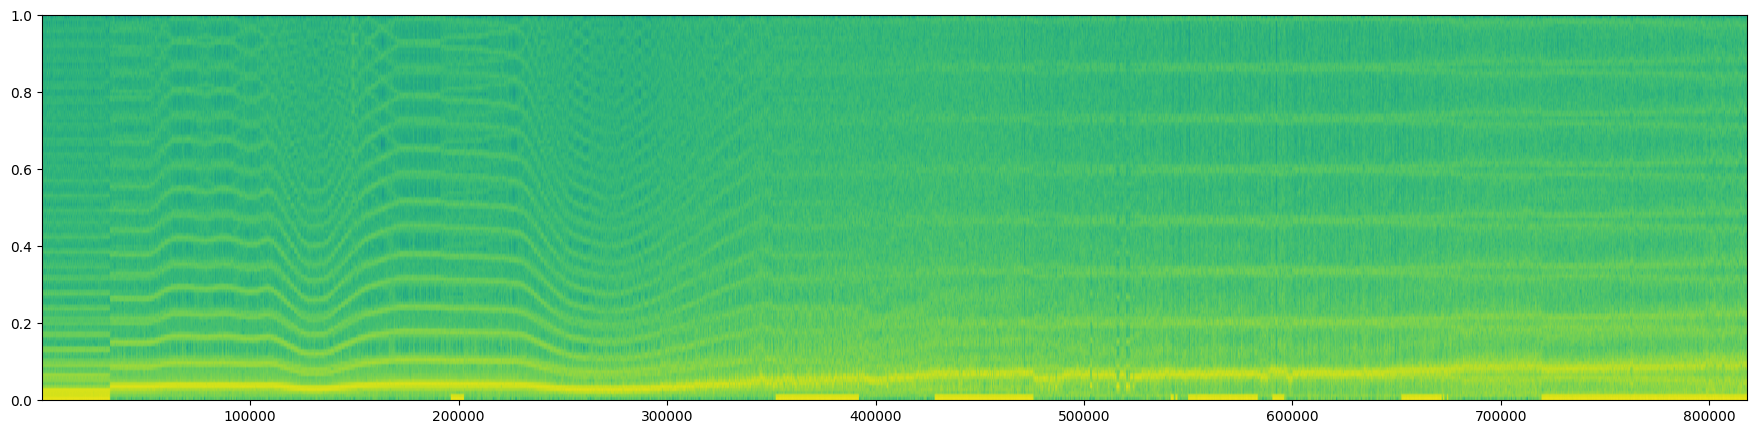

In [13]:
def audio_channels_arrays_of_pcm(pcm, n_channels=2):
    from recode import decode_pcm_bytes
    from pathlib import Path
    import os
    import numpy as np

    if isinstance(pcm, str):
        pcm_filepath = pcm
        pcm = Path(pcm_filepath).expanduser().absolute().read_bytes()

    assert isinstance(pcm, bytes), "pcm must be a bytes object or a path to a file"

    lists_of_channel_value_pairs = decode_pcm_bytes(pcm, n_channels=n_channels)

    return list(map(np.array, zip(*lists_of_channel_value_pairs)))


pcm_filepath = '~/Dropbox/py/proj/t/theramin/misc/theramin_audio.pcm'
channel_1, channel_2 = audio_channels_arrays_of_pcm(pcm_filepath)

import hum

# channel_1 is a lot of hiss. channel_2 is the actual signal
hum.disp_wf(channel_2)

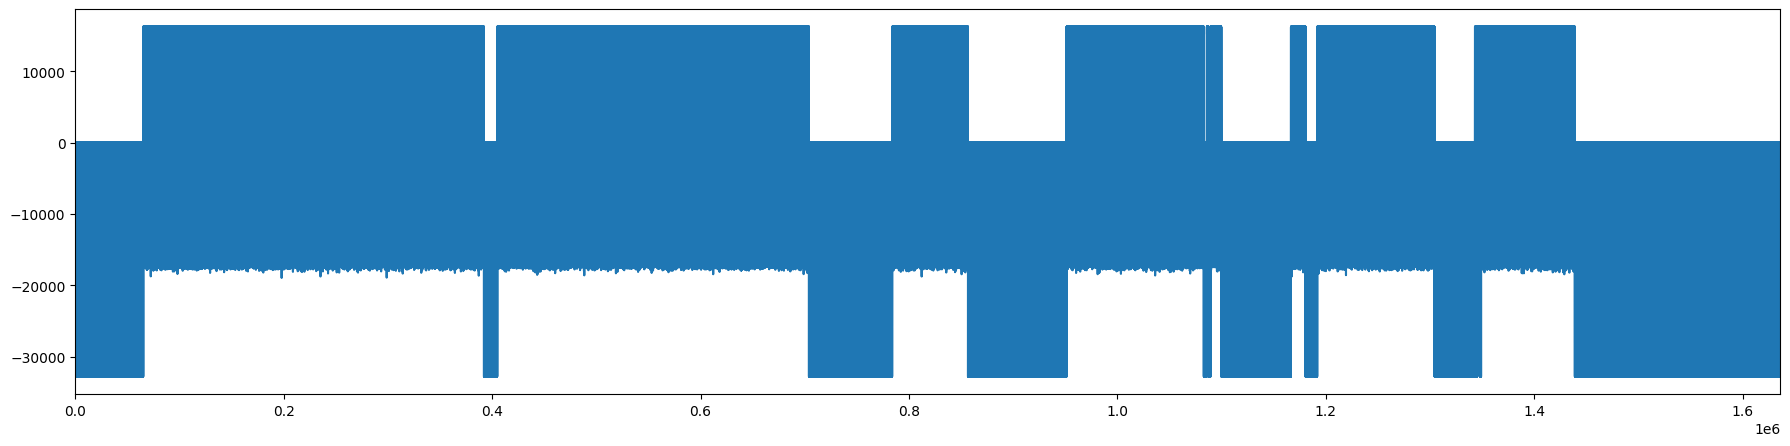

In [8]:
hum.plot_wf(channel_2)

# Getting content for AI

## Making the mediapipe guide

In [1]:
import scraped

url = 'https://ai.google.dev/edge/mediapipe/solutions/guide'
scraped.markdown_of_site(
    url, depth=2, 
    save_filepath='/Users/thorwhalen/Dropbox/_odata/ai_contexts/documentation/mediapipe_guide.md'
)

'/Users/thorwhalen/Dropbox/_odata/ai_contexts/documentation/mediapipe_guide.md'

In [1]:
set({'openness': 0.13809361222165162, 'index_finger_extension_angle1': 69.02349616887912, 'index_finger_extension_angle2': 141.72146681252184, 'thumb_index_distance': 0.13453158385770417, 'is_pinching': False})

{'index_finger_extension_angle1',
 'index_finger_extension_angle2',
 'is_pinching',
 'openness',
 'thumb_index_distance'}

## Getting content from github

In [ ]:
from hubcap import repo_text_aggregate
from pathlib import Path

string = repo_text_aggregate('')
Path('')

# Scrap

## SigTo types

In [51]:
from pyo import PyoObject, SigTo
from typing import Union
SigToValueType = Union[float, int, PyoObject]
_sigto_value_types = SigToValueType.__args__
_sigto_value_types

(float, int, pyo.lib._core.PyoObject)

In [53]:
# import module from filepath
from importlib.util import spec_from_file_location, module_from_spec
import importlib.util
import os
import sys
import importlib
import importlib.util

filepath = '/Users/thorwhalen/Dropbox/py/proj/t/theramin/misc/_12_wrist_lines_w_pyo.py'
spec = importlib.util.spec_from_file_location("module.name", filepath)
module = importlib.util.module_from_spec(spec)
spec.loader.exec_module(module)
# Now you can use the module

In [99]:
theremin_knobs = module.theremin_knobs
theremin_synth = module.theremin_synth
sine_synth = module.sine_synth

from i2 import Sig 

Sig(theremin_synth)

<Sig (freq=440, volume=0.5, attack=0.01, release=0.1, vibrato_rate=5, vibrato_depth=5, *, waveform='sine')>

In [5]:
from pyo import * 


def theremin_synth(
    freq=440,
    volume=0.5,
    attack=0.01,
    release=0.1,
    vibrato_rate=5,
    vibrato_depth=5,
    *,
    waveform='sine',
):
    """
    Emulates a classic theremin sound.

    Parameters:
    - freq (float): Base frequency in Hz.
    - volume (float): Output volume (0 to 1).
    - waveform (str): Waveform type ('sine', 'triangle', 'square').
    - attack (float): Attack time in seconds.
    - release (float): Release time in seconds.
    - vibrato_rate (float): Vibrato frequency in Hz.
    - vibrato_depth (float): Vibrato depth in Hz.

    Returns:
    - PyoObject: The resulting audio signal.
    """
    # Select waveform
    waveforms = {
        'sine': Sine,
        'triangle': lambda freq, mul: LFO(freq=freq, type=3, mul=mul),
        'square': lambda freq, mul: LFO(freq=freq, type=1, mul=mul),
    }
    wave_class = waveforms.get(waveform, Sine)

    # Vibrato modulation
    vibrato = Sine(freq=vibrato_rate, mul=vibrato_depth)

    # Envelope
    env = Adsr(
        attack=attack, decay=0.1, sustain=0.8, release=release, dur=0, mul=volume
    )
    env.play()
    # Oscillator with vibrato
    osc = wave_class(freq=freq + vibrato, mul=env)

    return osc



from functools import wraps
from pyo import PyoObject

def auto_val(fn):
    @wraps(fn)
    def wrapper(*args, **kwargs):
        # Only unwrap if value is a PyoObject and has .value
        clean_kwargs = {
            k: (v.value if isinstance(v, PyoObject) and hasattr(v, 'value') else v)
            for k, v in kwargs.items()
        }
        return fn(*args, **clean_kwargs)
    return wrapper

# @auto_val
def sine_synth(freq=440, volume=0, **kwargs):
    return Sine(freq=freq, mul=volume)



def supersaw_synth(freq=440, volume=0, detune=0.01, n_voices=7, **kwargs):
    voices = [
        LFO(
            freq=freq * (1 + detune * (i - n_voices // 2)),
            type=5,
            mul=volume / n_voices,
        )
        for i in range(n_voices)
    ]
    return sum(voices)



from hum.pyo_util import Synth, knob_params

synth = Synth(sine_synth)

synth = Synth(supersaw_synth, knob_exclude=['n_voices'])

# synth_func = knob_params('volume', 'freq', 'detune')(supersaw_synth)
# synth = Synth(synth_func, knob_exclude=['n_voices'])

with synth:
    time.sleep(1)
    synth.knobs.update({'volume': 0.5})
    time.sleep(1)
    synth.knobs.update({'volume': {'value': 0, 'time': 0.5}})
    time.sleep(0.5)


synth._initial_knob_params


{'freq': < Instance of SigTo class >,
 'volume': < Instance of SigTo class >,
 'detune': < Instance of SigTo class >,
 'n_voices': 7}

In [2]:
from hum.pyo_util import Synth, knob_params
import time

@knob_params('freq', 'volume')
def sine_synth(freq=440, volume=0, **kwargs):
    return Sine(freq=freq, mul=volume)

synth = Synth(sine_synth)

with synth:
    time.sleep(1)
    synth.knobs.update({'volume': 0.5})
    time.sleep(1)
    synth.knobs.update({'volume': {'value': 0, 'time': 0.5}})
    time.sleep(0.5)

In [3]:
with synth:
    time.sleep(1)
    synth.knobs.update({'volume': 0.5})
    time.sleep(1)
    synth.knobs.update({'volume': {'value': 0, 'time': 0.5}})
    time.sleep(0.5)


In [5]:

# Dual sine oscillator with LFO-controlled lowpass filter
def dual_osc_graph(freq1=220, freq2=330, amp=0.3, lfo_freq=0.5):
    osc1 = Sine(freq=freq1)
    osc2 = Sine(freq=freq2)
    blend = Mix([osc1, osc2], voices=2) * amp
    lfo = Sine(freq=lfo_freq).range(400, 2000)
    return ButLP(blend, freq=lfo)

synth = Synth(dual_osc_graph)
# 👂 Frequency shifts with LFO sweeping filter
with synth:
    time.sleep(0.5)
    synth.knobs['freq1'] = 440
    time.sleep(1)
    synth.knobs['freq2'] = SigTo(550, time=0.5)  # Smooth shift
    time.sleep(0.5)
    synth.knobs.update(dict(freq1={'value': 880, 'time': 0.1}, freq2=1100))
    time.sleep(1)


In [98]:
from hum.pyo_util import Synth

synth = Synth(sine_synth)

with synth:
    time.sleep(1)
    synth.knobs.update({'volume': 0.5})
    synth.knobs.update({'volume': {'value': 0, 'time': 0.5}})
    time.sleep(0.5)

synth._initial_knob_params

{'freq': < Instance of SigTo class >, 'volume': < Instance of SigTo class >}

In [86]:
import time

with synth:
    time.sleep(1)
    synth.knobs['freq'] = 200
    time.sleep(1)
    synth.knobs['volume'] = {'value': 0, 'time': 0.2}
    time.sleep(1)


In [76]:
from pyo import * 

def dual_osc_graph(freq1=220, freq2=330, amp=0.3, lfo_freq=0.5):
    osc1 = Sine(freq=freq1)
    osc2 = Sine(freq=freq2)
    blend = Mix([osc1, osc2], voices=2) * amp
    lfo = Sine(freq=lfo_freq).range(400, 2000)
    return ButLP(blend, freq=lfo)

synth = Synth(sine_synth, nchnls=2)
# 👂 Frequency shifts with LFO sweeping filter
with synth:
    time.sleep(0.5)
    synth.knobs['freq'] = 440
    time.sleep(1)

KeyError: 'fdreq'

## Slabs

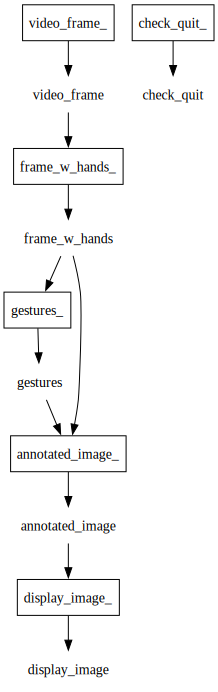

In [4]:
from _05_hand_gesture_w_slabs import create_slabs_instance
s = create_slabs_instance(None, None, None)

s.dot_digraph()

{}

In [ ]:
import enum
from typing import Dict


class Controls(enum.Enum):
    INCREASE_PITCH = 'increase_pitch'
    DECREASE_PITCH = 'decrease_pitch'
    INCREASE_VOLUME = 'increase_volume'
    DECREASE_VOLUME = 'decrease_volume'


KLAZ_CONTROL_KEYS = {
    'k': Controls.INCREASE_PITCH,
    'l': Controls.DECREASE_PITCH,
    'a': Controls.INCREASE_VOLUME,
    'z': Controls.DECREASE_VOLUME,
}

ARROW_KEYS = {
    'up': Controls.INCREASE_PITCH,
    'down': Controls.DECREASE_PITCH,
    'right': Controls.INCREASE_VOLUME,
    'left': Controls.DECREASE_VOLUME,
}

WASD_KEYS = {
    'a': Controls.INCREASE_PITCH,
    'd': Controls.DECREASE_PITCH,
    'w': Controls.INCREASE_VOLUME,
    's': Controls.DECREASE_VOLUME,
}


def keyboard_theramin(
    pitches,
    volumes,
    instrument,
    control_keys: Dict[str, Controls]=KLAZ_CONTROL_KEYS,
    validation_warning: bool=True,
    interrupt_key: str='q',
):
    """
    Launch a keyboard theramin.
    This will launch a process that will play sound continuously, decreasing or 
    increasing it's pitch when, respectively.

    :param pitches: list of pitches to play. The order of the pitches will determin
        what pitch is played when the Controls.INCREASE_PITCH or Controls.DECREASE_PITCH
        is pressed. Unless disabled, a warning is raised if the pitches are not sorted.
    :param volumes: list of volumes to play. The order of the volumes will determine
        what volume is played when the Controls.INCREASE_VOLUME or Controls.DECREASE_VOLUME
        is pressed. Unless disabled, a warning is raised if the volumes are not sorted.
    :param instrument: the instrument to play the sound with.
    :param control_keys: a dictionary mapping keys to Controls.
    :param validation_warning: whether to raise a warning if the pitches or volumes are not sorted.
    :param interrupt_key: the key that will interrupt the process.

    Extra information:
    
    If an increase of pitch or volume would go beyond the list of pitches or volumes,
    the last pitch or volume is played.

    """


In [5]:
import mido

print(mido.get_output_names())

[]


In [2]:
import time
import fluidsynth

def play_note_with_fluidsynth(note, velocity, duration, soundfont):
    # Initialize FluidSynth
    fs = fluidsynth.Synth()
    fs.start()

    # Load the soundfont
    sfid = fs.sfload(soundfont)
    fs.program_select(0, sfid, 0, 0)

    # Play the note
    fs.noteon(0, note, velocity)

    # Wait for the specified duration
    time.sleep(duration)

    # Stop the note
    fs.noteoff(0, note)

    # Cleanup
    fs.delete()

# Example usage
note = 60  # Middle C
velocity = 64  # Standard velocity
duration = 1.0  # 1 second
soundfont = "/Users/thorwhalen/Dropbox/Media/soundfonts/Arachno SoundFont - Version 1.0.sf2"

play_note_with_fluidsynth(note, velocity, duration, soundfont)

ImportError: Couldn't find the FluidSynth library.